<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/RNN_Quest_1_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN_Quest_1: We will implement a pretrained RNN_Model and classify some artwork! After all, this is more fun than looking at welding seems or lung cancer data. 

You can download the data from: 

https://www.kaggle.com/ikarus777/best-artworks-of-all-time?select=artists.csv

Now only select the data in images of the following painters:

- Rembrandt
- Dürer
- Leonardo da Vinci
- Caravaggio 
- de Bongione 

These are required - if you want, you can also add others, like

- Michelangelo 

- Raffael

and even more. Just make sure that they are from sort of the same time and hence have a similar style. It's pretty easy to distinguish a Rembrandt from an Andy Warhol.

After you have done that, put the images into a data structure like in the Live-Coding last week. You can do that with the script from then (altered of course) - or just do it by hand. But please do not split into Train, Validation and Test set by hand. Use sklearn or any other method to randomly sample the images of each folder into the three sets. 




In [21]:
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,BatchNormalization,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [22]:
import glob
import cv2
import keras,os
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,BatchNormalization,AveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd

# Helper

In [23]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

def plot_confusion_matrix_x(labels,predictions,classes_name):
  """
  example:
  predictions=max_predict
  labels=test_generator.classes
  classes_name = artist_list
  """
  

  con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,index = classes_name,columns = classes_name)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [24]:
import matplotlib.pyplot as plt

def history_plot_from_loss_acc(history, title):
  plt.figure(figsize=(10,5))

  train_loss_list = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss_list = history.history['val_loss']
  val_accuracy_list = history.history['val_accuracy']
  x = history.epoch
  
  plt.subplot(1,2,1)
  plt.plot(x, train_loss_list)
  plt.plot(x, val_loss_list)
  plt.legend(['train_loss', 'val_loss'])
  plt.title(title+"_ LOSS")
  
  plt.subplot(1,2,2)
  plt.plot(x, train_accuracy)
  plt.plot(x, val_accuracy_list)
  plt.legend(['train_acc','val_accuracy'])
  plt.title(title+"_ ACCURACY")
  plt.show()

In [25]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive')
# change directory
%cd /content/
# create new local directory, i.e. on the current machine which you are connected to
!mkdir local_data   # could also be another name than local_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
mkdir: cannot create directory ‘local_data’: File exists


In [26]:
#/content/drive/MyDrive/Copy_Material_AIDA_2021/Specialization_ML3/Week_3/resized.zip
!unzip '/content/drive/MyDrive/Copy_Material_AIDA_2021/_spec_ML3_wolfgang/Week_3/resized.zip' -d local_data

Archive:  /content/drive/MyDrive/Copy_Material_AIDA_2021/_spec_ML3_wolfgang/Week_3/resized.zip
 extracting: local_data/resized/Albrecht_DuтХа├кrer_1.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_10.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_100.jpg  
  inflating: local_data/resized/Albrecht_DuтХа├кrer_101.jpg  
  inflating: local_data/resized/Albrecht_DuтХа├кrer_102.jpg  
  inflating: local_data/resized/Albrecht_DuтХа├кrer_103.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_104.jpg  
  inflating: local_data/resized/Albrecht_DuтХа├кrer_105.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_106.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_107.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_108.jpg  
 extracting: local_data/resized/Albrecht_DuтХа├кrer_109.jpg  
  inflating: local_data/resized/Albrecht_DuтХа├кrer_11.jpg  
  inflating: local_data/resized/Albrecht_DuтХа├кrer_110.jpg  
 extracting: local_data/resized/Albrecht_

In [27]:
cd /content/

/content


In [28]:
#!mkdir training_set
#!mkdir test_set

In [29]:
#ls -l

In [30]:
#rm -r ./local_data/

In [31]:
#/content/local_data/resized
#data_path = 'C:/_dev/_aida/scientificProject/data/w_3/resized'
data_path = '/content/local_data/resized'

#/content/local_data/
#main_target_path = 'C:\\_dev\\_aida\\scientificProject\\data\\w_3\\'
main_target_path = '/content/local_data'


all_subdir = 'data_set'
train_subdir = 'train'
val_subdir = 'valid'
test_subdir = 'test'

train_size = 0.7
val_size = 0.15
test_size = 0.15

artist_list = ['Albrecht_Duerer','Caravaggio','Giotto_di_Bondone','Leonardo_da_Vinci','Michelangelo','Raphael','Rembrandt']
data_format = '/*.jpg'


In [109]:
artist_name_class_dict = { i : artist_list[i] for i in range(0, len(artist_list) ) }
artist_class_name_dict = { artist_list[i] : i for i in range(0, len(artist_list) ) }

In [ ]:
#artist_dict = {0:'Albrecht_Duerer',1:'Caravaggio',2:'Giotto_di_Bondone',3:'Leonardo_da_Vinci',4:'Michelangelo',5:'Raphael',6:'Rembrandt'}

In [110]:
artist_class_name_dict

{'Albrecht_Duerer': 0,
 'Caravaggio': 1,
 'Giotto_di_Bondone': 2,
 'Leonardo_da_Vinci': 3,
 'Michelangelo': 4,
 'Raphael': 5,
 'Rembrandt': 6}

# import and organize images

In [32]:
for file_name in listdir(data_path):
    print(file_name)

    #convert Albrecht_DuÔòá├¬rer
    if file_name.startswith('Albrecht_DuтХа├кrer'):
        new_file_name = file_name.replace('Albrecht_DuтХа├кrer','Albrecht_Duerer_x')
    elif file_name.startswith('Albrecht_Du╠Иrer'):
        new_file_name = file_name.replace('Albrecht_Du╠Иrer','Albrecht_Duerer_y')
    else:
        new_file_name = file_name

    for artist_name in artist_list:
        if new_file_name.startswith(artist_name):
            filepath = os.path.join(data_path,file_name)
            new_filepath = os.path.join(main_target_path,all_subdir,artist_name,new_file_name)

            #check dir and create
            if not os.path.exists(os.path.join(main_target_path,all_subdir,artist_name)):
                os.makedirs(os.path.join(main_target_path,all_subdir,artist_name))
            #move file
            try:
                os.rename(filepath, new_filepath)
            except:
                continue

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Edgar_Degas_647.jpg
Albrecht_DuтХа├кrer_101.jpg
Kazimir_Malevich_49.jpg
Gustav_Klimt_90.jpg
Edgar_Degas_6.jpg
Joan_Miro_92.jpg
Edvard_Munch_12.jpg
Camille_Pissarro_24.jpg
Titian_155.jpg
Alfred_Sisley_110.jpg
Gustave_Courbet_7.jpg
Marc_Chagall_82.jpg
Vincent_van_Gogh_704.jpg
Paul_Klee_75.jpg
Pierre-Auguste_Renoir_79.jpg
Albrecht_Du╠Иrer_86.jpg
Vincent_van_Gogh_831.jpg
Paul_Gauguin_293.jpg
Edgar_Degas_515.jpg
Jan_van_Eyck_2.jpg
Francisco_Goya_211.jpg
Joan_Miro_96.jpg
Vincent_van_Gogh_247.jpg
Pierre-Auguste_Renoir_224.jpg
Joan_Miro_8.jpg
Titian_212.jpg
Paul_Gauguin_281.jpg
Marc_Chagall_109.jpg
Vincent_van_Gogh_801.jpg
Kazimir_Malevich_72.jpg
Henri_Matisse_162.jpg
Albrecht_Du╠Иrer_42.jpg
Rembrandt_65.jpg
Amedeo_Modigliani_50.jpg
Pablo_Picasso_63.jpg
Alfred_Sisley_81.jpg
Gustav_Klimt_34.jpg
Frida_Kahlo_52.jpg
Albrecht_DuтХа├кrer_36.jpg
Titian_77.jpg
Claude_Monet_19.jpg
Vincent_van_Gogh_191.jpg
Jackson_Pollock_3.jpg
Gustav_Kl

In [33]:
import glob
data_format = '/*.jpg'

def number_of_images_in_path(target_path,data_format):
    print(target_path)
    img_path_list = glob.glob(target_path + data_format)
           
    n = len(img_path_list)
    print(f'Number of images: {n}\n')

for artist_name in artist_list:
    number_of_images_in_path(os.path.join(os.sep,main_target_path,all_subdir,artist_name),data_format)

/content/local_data/data_set/Albrecht_Duerer
Number of images: 656

/content/local_data/data_set/Caravaggio
Number of images: 55

/content/local_data/data_set/Giotto_di_Bondone
Number of images: 119

/content/local_data/data_set/Leonardo_da_Vinci
Number of images: 143

/content/local_data/data_set/Michelangelo
Number of images: 49

/content/local_data/data_set/Raphael
Number of images: 109

/content/local_data/data_set/Rembrandt
Number of images: 262



Now explore the data. 

- What are the different image dimensions?

- How are the labels distributed?

- What else would be useful to know?

In [34]:
def get_image_information(main_target_path,sub_path ,class_list ,data_format ):
    info_array = []#np.array([[0,8]])
    column_names = ['class_x','name_x','row','column','channel','shape','main_target_path','sub_path']

    for class_name in class_list:
        path = os.path.join(os.sep,main_target_path,sub_path,class_name)
        img_path_list = glob.glob(path + data_format)

        for img_path in img_path_list:
            img = cv2.imread(img_path)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            info_array.append([class_name,os.path.split(img_path)[-1],img.shape[0],img.shape[1],img.shape[2],img.shape,main_target_path,sub_path])

    df = pd.DataFrame(data=info_array,columns= column_names)
    return df

df =get_image_information(main_target_path=main_target_path,sub_path=all_subdir,class_list=artist_list,data_format=data_format)
df

,class_x,name_x,row,column,channel,shape,main_target_path,sub_path
0,Albrecht_Duerer,Albrecht_Duerer_y_230.jpg,1229,893,3,"(1229, 893, 3)",/content/local_data,data_set
1,Albrecht_Duerer,Albrecht_Duerer_y_88.jpg,1229,835,3,"(1229, 835, 3)",/content/local_data,data_set
2,Albrecht_Duerer,Albrecht_Duerer_x_166.jpg,614,598,3,"(614, 598, 3)",/content/local_data,data_set
3,Albrecht_Duerer,Albrecht_Duerer_y_268.jpg,614,442,3,"(614, 442, 3)",/content/local_data,data_set
4,Albrecht_Duerer,Albrecht_Duerer_y_74.jpg,1229,1080,3,"(1229, 1080, 3)",/content/local_data,data_set
...,...,...,...,...,...,...,...,...
1388,Rembrandt,Rembrandt_228.jpg,540,437,3,"(540, 437, 3)",/content/local_data,data_set
1389,Rembrandt,Rembrandt_188.jpg,663,886,3,"(663, 886, 3)",/content/local_data,data_set
1390,Rembrandt,Rembrandt_23.jpg,614,518,3,"(614, 518, 3)",/content/local_data,data_set
1391,Rembrandt,Rembrandt_61.jpg,614,509,3,"(614, 509, 3)",/content/local_data,data_set


In [35]:
df['size'] = df.apply(lambda x: x.row*x.column,axis=1)

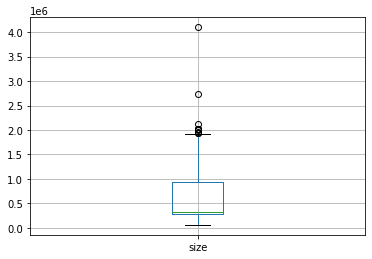

In [36]:
df[['size']].boxplot()

In [37]:
df['size'].quantile([0.25,0.5,0.75,1])

0.25     276300.0
0.50     332353.0
0.75     934040.0
1.00    4100656.0
Name: size, dtype: float64

In [38]:
df['size'].describe()

count    1.393000e+03
mean     5.760644e+05
std      4.470891e+05
min      6.030000e+04
25%      2.763000e+05
50%      3.323530e+05
75%      9.340400e+05
max      4.100656e+06
Name: size, dtype: float64

In [39]:
df_group = df.groupby('class_x').agg(img_count=('class_x','count'),size_mean=('size','mean'),size_min=('size','min'),size_max=('size','max')).reset_index()

In [40]:
import math
df_group['size_mean_sqrt'] = df_group['size_mean'].apply(lambda x: math.sqrt(x))

In [41]:
df_group

,class_x,img_count,size_mean,size_min,size_max,size_mean_sqrt
0,Albrecht_Duerer,656,736346.371951,93240,1866851,858.106271
1,Caravaggio,55,872363.345455,158760,2028594,934.003932
2,Giotto_di_Bondone,119,312735.689076,157700,373240,559.227761
3,Leonardo_da_Vinci,143,365021.181818,60300,1574195,604.169829
4,Michelangelo,49,630654.448980,251126,1369256,794.137550
5,Raphael,109,283307.486239,106836,376996,532.266368
6,Rembrandt,262,458924.843511,97560,4100656,677.439919


In [43]:
df.groupby('class_x').agg(row_min=('row','min'),row_max=('row','max'),row_maen=('row','mean'),column_min=('column','min'),column_man=('column','max'),column_mean=('column','mean'))

,row_min,row_max,row_maen,column_min,column_man,column_mean
class_x,,,,,,
Albrecht_Duerer,239,1229,899.481707,241,1536,736.542683
Caravaggio,417,1671,922.890909,270,1214,841.581818
Giotto_di_Bondone,360,778,587.344538,360,756,540.495798
Leonardo_da_Vinci,232,1604,645.195804,201,1097,533.811189
Michelangelo,410,1378,768.061224,409,1148,774.020408
Raphael,174,614,589.724771,354,614,485.688073
Rembrandt,360,2296,691.984733,271,1786,606.858779


## orginze in train,test and validate

In [44]:
all_subdir = 'data_set'
train_subdir = 'train'
val_subdir = 'validation'
test_subdir = 'test'

train_size = 0.7
val_size = 0.15
test_size = 0.15

def number_of_images_in_path(target_path,data_format):
    print(target_path)
    img_path_list = glob.glob(target_path + data_format)

    n = len(img_path_list)
    print(f'Number of images: {n}\n')
    return img_path_list

def organize_train_test_vaildation_dir(main_target_path,all_subdir,class_list,data_format,ml_subdir_list,train_size,test_size,validation_size):
    """
    :param main_target_path:
    :param all_subdir:
    :param class_list:
    :param data_format:
    :param ml_subdir_list:
    :param train_size:
    :param test_size:
    :param validation_size:
    :return:
    """
    assert(train_size+test_size+validation_size == 1)

    for ml_subdir in ml_subdir_list:
        if not os.path.exists(os.path.join(main_target_path, ml_subdir)):
            os.makedirs(os.path.join(main_target_path, ml_subdir))

    for class_name in class_list:
        img_path_list =  number_of_images_in_path(os.path.join(os.sep,main_target_path,all_subdir,class_name),data_format)

        #shuffle
        np.random.shuffle(img_path_list)
        #create class_dir
        for ml_subdir in ml_subdir_list:
            if not os.path.exists(os.path.join(main_target_path,ml_subdir,class_name)):
                os.makedirs(os.path.join(main_target_path,ml_subdir,class_name))

        #move images to class subdir
        train_stop = int(len(img_path_list) * train_size)
        validation_stop = train_stop + int(len(img_path_list) * validation_size)
        test_stop = validation_stop + int(len(img_path_list) * test_size)

        n = 0
        for imp_path in img_path_list:
            new_filepath = ''
            if n <= train_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[0], class_name, os.path.split(img_path_list[n])[-1])
            elif n <= validation_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[1], class_name, os.path.split(img_path_list[n])[-1])
            elif n <= test_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[2], class_name, os.path.split(img_path_list[n])[-1])

            # move file
            try:
                os.rename(img_path_list[n], new_filepath)
                n += 1
            except:
                continue


organize_train_test_vaildation_dir(main_target_path=main_target_path,all_subdir=all_subdir,
                                   class_list=artist_list,data_format=data_format,
                                   ml_subdir_list=[train_subdir,val_subdir,test_subdir],
                                   train_size=train_size,
                                   validation_size=val_size,
                                   test_size=test_size)

/content/local_data/data_set/Albrecht_Duerer
Number of images: 656

/content/local_data/data_set/Caravaggio
Number of images: 55

/content/local_data/data_set/Giotto_di_Bondone
Number of images: 119

/content/local_data/data_set/Leonardo_da_Vinci
Number of images: 143

/content/local_data/data_set/Michelangelo
Number of images: 49

/content/local_data/data_set/Raphael
Number of images: 109

/content/local_data/data_set/Rembrandt
Number of images: 262



What is the most obvious way to deal with this data?

Think a bit about it. 

Correct: We just resize all images to the same size! In this case to a dimension which can easily be used in a Resnet50 or a VGG_16 or VGG_19, i.e. 224 x 224 You do not have to code this here, as the data generator will do it for us (at least if you use the same one as last week). 

Now set up the data generator - and test it. 


In [45]:
train_gen = ImageDataGenerator(rescale=1./255.)
validation_gen = ImageDataGenerator(rescale=1./255.)
test_gen = ImageDataGenerator(rescale=1./255.)

In [90]:
train_generator = train_gen.flow_from_directory(directory="/content/local_data/train",target_size=(224,224),batch_size=16,shuffle=True,seed=42)
valid_generator = validation_gen.flow_from_directory(directory="/content/local_data/validation",target_size=(224,224),batch_size=16,shuffle=False,seed=42)
test_generator = test_gen.flow_from_directory(directory="/content/local_data/test", target_size=(224,224),batch_size=16,shuffle=False,seed=42)

Found 980 images belonging to 7 classes.
Found 206 images belonging to 7 classes.
Found 206 images belonging to 7 classes.


Now set up a Resnet50 and a VGG_19 (or another model for comparison), pretrained on Imagenet - and write a new custom top-layer to match the number of classes you've chosen. 

# simple model for baseline, model

In [47]:
in_shape = (224,224,3)

In [48]:
learning_rate = 0.0001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=in_shape))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 346112)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [49]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [50]:
mcp = ModelCheckpoint('best_model_simple', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [51]:
history_model = model.fit(train_generator,validation_data = valid_generator,epochs=10,callbacks=[mcp])    

Epoch 1/10
62/62 [==============================] - 42s 154ms/step - loss: 1.4455 - accuracy: 0.5177 - val_loss: 1.0791 - val_accuracy: 0.6796

Epoch 00001: val_accuracy improved from -inf to 0.67961, saving model to best_model_simple
INFO:tensorflow:Assets written to: best_model_simple/assets
Epoch 2/10
62/62 [==============================] - 9s 147ms/step - loss: 0.9267 - accuracy: 0.7347 - val_loss: 0.7658 - val_accuracy: 0.7573

Epoch 00002: val_accuracy improved from 0.67961 to 0.75728, saving model to best_model_simple
INFO:tensorflow:Assets written to: best_model_simple/assets
Epoch 3/10
62/62 [==============================] - 9s 146ms/step - loss: 0.5990 - accuracy: 0.8143 - val_loss: 0.6672 - val_accuracy: 0.7767

Epoch 00003: val_accuracy improved from 0.75728 to 0.77670, saving model to best_model_simple
INFO:tensorflow:Assets written to: best_model_simple/assets
Epoch 4/10
62/62 [==============================] - 9s 147ms/step - loss: 0.4183 - accuracy: 0.8752 - val_loss:

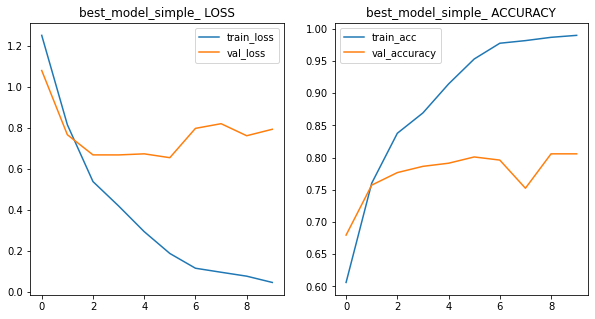

In [52]:
history_plot_from_loss_acc(history_model,'best_model_simple')

In [53]:
best_model = load_model('best_model_simple')
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 346112)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [54]:
best_model.evaluate(test_generator)

13/13 [==============================] - 2s 104ms/step - loss: 0.7884 - accuracy: 0.7864


[0.7883513569831848, 0.7864077687263489]

# VGG16 from Keras, model_vgg16_c

Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [55]:
import tensorflow. keras as keras
vgg16_model = keras.applications.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [56]:
vgg16_model = keras.applications.vgg16.VGG16(
  weights='imagenet',
  include_top=False,
  input_shape=in_shape)

58892288/58889256 [==============================] - 1s 0us/step


In [57]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#vgg16_model.layers

In [58]:
model_vgg16_c = Sequential()
for layer in vgg16_model.layers:
  model_vgg16_c.add(layer)

In [59]:
for layer in model_vgg16_c.layers:
  layer.trainable = False

In [60]:
model_vgg16_c.add(Flatten())
model_vgg16_c.add(Dense(256,activation='relu'))
model_vgg16_c.add(Dropout(0.5))
model_vgg16_c.add(Dense(7,activation='softmax'))
model_vgg16_c.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [61]:
model_vgg16_c.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [62]:
mcp = ModelCheckpoint('keras_applications_VGG16', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [63]:
history_model_vgg16_c = model_vgg16_c.fit(train_generator,validation_data = valid_generator,epochs=15,callbacks=[mcp])    

Epoch 1/15
62/62 [==============================] - 18s 229ms/step - loss: 1.4202 - accuracy: 0.5043 - val_loss: 0.6479 - val_accuracy: 0.7718

Epoch 00001: val_accuracy improved from -inf to 0.77184, saving model to keras_applications_VGG16
INFO:tensorflow:Assets written to: keras_applications_VGG16/assets
Epoch 2/15
62/62 [==============================] - 10s 156ms/step - loss: 0.5002 - accuracy: 0.8227 - val_loss: 0.5141 - val_accuracy: 0.7961

Epoch 00002: val_accuracy improved from 0.77184 to 0.79612, saving model to keras_applications_VGG16
INFO:tensorflow:Assets written to: keras_applications_VGG16/assets
Epoch 3/15
62/62 [==============================] - 10s 158ms/step - loss: 0.3638 - accuracy: 0.8742 - val_loss: 0.4619 - val_accuracy: 0.8350

Epoch 00003: val_accuracy improved from 0.79612 to 0.83495, saving model to keras_applications_VGG16
INFO:tensorflow:Assets written to: keras_applications_VGG16/assets
Epoch 4/15
62/62 [==============================] - 10s 157ms/step 

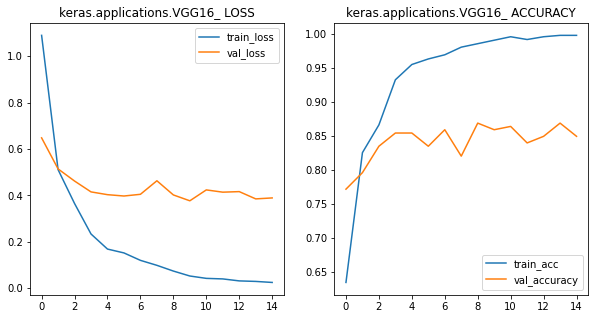

In [64]:
history_plot_from_loss_acc(history_model_vgg16_c,'keras.applications.VGG16')

In [65]:
best_keras_applications_VGG16_model = load_model('keras_applications_VGG16')

In [66]:
y_eval = best_keras_applications_VGG16_model.evaluate(test_generator)

13/13 [==============================] - 2s 119ms/step - loss: 0.5146 - accuracy: 0.8495


## generator featuring test data frame

In [92]:
df.head(5)

,class_x,name_x,row,column,channel,shape,main_target_path,sub_path,size
0,Albrecht_Duerer,Albrecht_Duerer_y_230.jpg,1229,893,3,"(1229, 893, 3)",/content/local_data,data_set,1097497
1,Albrecht_Duerer,Albrecht_Duerer_y_88.jpg,1229,835,3,"(1229, 835, 3)",/content/local_data,data_set,1026215
2,Albrecht_Duerer,Albrecht_Duerer_x_166.jpg,614,598,3,"(614, 598, 3)",/content/local_data,data_set,367172
3,Albrecht_Duerer,Albrecht_Duerer_y_268.jpg,614,442,3,"(614, 442, 3)",/content/local_data,data_set,271388
4,Albrecht_Duerer,Albrecht_Duerer_y_74.jpg,1229,1080,3,"(1229, 1080, 3)",/content/local_data,data_set,1327320


In [93]:
test_generator.filenames[:5]

['Albrecht_Duerer/Albrecht_Duerer_x_10.jpg',
 'Albrecht_Duerer/Albrecht_Duerer_x_106.jpg',
 'Albrecht_Duerer/Albrecht_Duerer_x_108.jpg',
 'Albrecht_Duerer/Albrecht_Duerer_x_116.jpg',
 'Albrecht_Duerer/Albrecht_Duerer_x_119.jpg']

### start

In [95]:
y_predict_vgg16 = best_keras_applications_VGG16_model.predict(test_generator)

In [96]:
y_predict_vgg16 = np.argmax(y_predict_vgg16, axis=-1)

In [97]:
pre_file_df = pd.DataFrame(data=[y_predict_vgg16,test_generator.filenames]).T

In [101]:
pre_file_df.columns = ['predict','class_name']

In [102]:
pre_file_df.sort_values('class_name').head(3)

,predict,class_name
0,0,Albrecht_Duerer/Albrecht_Duerer_x_10.jpg
1,0,Albrecht_Duerer/Albrecht_Duerer_x_106.jpg
2,0,Albrecht_Duerer/Albrecht_Duerer_x_108.jpg


In [103]:
df_test =get_image_information(main_target_path=main_target_path,sub_path='test',class_list=artist_list,data_format=data_format)
df_test

,class_x,name_x,row,column,channel,shape,main_target_path,sub_path
0,Albrecht_Duerer,Albrecht_Duerer_x_274.jpg,1229,850,3,"(1229, 850, 3)",/content/local_data,test
1,Albrecht_Duerer,Albrecht_Duerer_y_253.jpg,450,614,3,"(450, 614, 3)",/content/local_data,test
2,Albrecht_Duerer,Albrecht_Duerer_y_137.jpg,614,385,3,"(614, 385, 3)",/content/local_data,test
3,Albrecht_Duerer,Albrecht_Duerer_y_249.jpg,1229,905,3,"(1229, 905, 3)",/content/local_data,test
4,Albrecht_Duerer,Albrecht_Duerer_y_109.jpg,1229,1468,3,"(1229, 1468, 3)",/content/local_data,test
...,...,...,...,...,...,...,...,...
201,Rembrandt,Rembrandt_190.jpg,614,457,3,"(614, 457, 3)",/content/local_data,test
202,Rembrandt,Rembrandt_254.jpg,960,689,3,"(960, 689, 3)",/content/local_data,test
203,Rembrandt,Rembrandt_62.jpg,614,543,3,"(614, 543, 3)",/content/local_data,test
204,Rembrandt,Rembrandt_235.jpg,614,533,3,"(614, 533, 3)",/content/local_data,test


In [104]:
df_test['class_name']=df_test.apply(lambda x: (str(x.class_x)+"/"+str(x.name_x)),axis=1)

In [106]:
df_test = pd.merge(df_test, pre_file_df, on=["class_name", "class_name"])

In [113]:
df_test['class_value'] = df_test.class_x.map(artist_class_name_dict)

In [114]:
df_test

,class_x,name_x,row,column,channel,shape,main_target_path,sub_path,class_name,predict,class_value
0,Albrecht_Duerer,Albrecht_Duerer_x_274.jpg,1229,850,3,"(1229, 850, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_x_274.jpg,0,0
1,Albrecht_Duerer,Albrecht_Duerer_y_253.jpg,450,614,3,"(450, 614, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_253.jpg,0,0
2,Albrecht_Duerer,Albrecht_Duerer_y_137.jpg,614,385,3,"(614, 385, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_137.jpg,0,0
3,Albrecht_Duerer,Albrecht_Duerer_y_249.jpg,1229,905,3,"(1229, 905, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_249.jpg,0,0
4,Albrecht_Duerer,Albrecht_Duerer_y_109.jpg,1229,1468,3,"(1229, 1468, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_109.jpg,0,0
...,...,...,...,...,...,...,...,...,...,...,...
201,Rembrandt,Rembrandt_190.jpg,614,457,3,"(614, 457, 3)",/content/local_data,test,Rembrandt/Rembrandt_190.jpg,6,6
202,Rembrandt,Rembrandt_254.jpg,960,689,3,"(960, 689, 3)",/content/local_data,test,Rembrandt/Rembrandt_254.jpg,6,6
203,Rembrandt,Rembrandt_62.jpg,614,543,3,"(614, 543, 3)",/content/local_data,test,Rembrandt/Rembrandt_62.jpg,6,6
204,Rembrandt,Rembrandt_235.jpg,614,533,3,"(614, 533, 3)",/content/local_data,test,Rembrandt/Rembrandt_235.jpg,6,6


In [136]:
 df_test[ df_test['predict'] == df_test['class_value'] ]

,class_x,name_x,row,column,channel,shape,main_target_path,sub_path,class_name,predict,class_value
0,Albrecht_Duerer,Albrecht_Duerer_x_274.jpg,1229,850,3,"(1229, 850, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_x_274.jpg,0,0
1,Albrecht_Duerer,Albrecht_Duerer_y_253.jpg,450,614,3,"(450, 614, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_253.jpg,0,0
2,Albrecht_Duerer,Albrecht_Duerer_y_137.jpg,614,385,3,"(614, 385, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_137.jpg,0,0
3,Albrecht_Duerer,Albrecht_Duerer_y_249.jpg,1229,905,3,"(1229, 905, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_249.jpg,0,0
4,Albrecht_Duerer,Albrecht_Duerer_y_109.jpg,1229,1468,3,"(1229, 1468, 3)",/content/local_data,test,Albrecht_Duerer/Albrecht_Duerer_y_109.jpg,0,0
...,...,...,...,...,...,...,...,...,...,...,...
201,Rembrandt,Rembrandt_190.jpg,614,457,3,"(614, 457, 3)",/content/local_data,test,Rembrandt/Rembrandt_190.jpg,6,6
202,Rembrandt,Rembrandt_254.jpg,960,689,3,"(960, 689, 3)",/content/local_data,test,Rembrandt/Rembrandt_254.jpg,6,6
203,Rembrandt,Rembrandt_62.jpg,614,543,3,"(614, 543, 3)",/content/local_data,test,Rembrandt/Rembrandt_62.jpg,6,6
204,Rembrandt,Rembrandt_235.jpg,614,533,3,"(614, 533, 3)",/content/local_data,test,Rembrandt/Rembrandt_235.jpg,6,6


In [138]:
df_test['test_result'] = df_test.apply(lambda x: x.predict == x.class_value,axis = 1)

In [146]:
df_groups = df_test.groupby('class_x').agg( class_sum =('class_x','count'),test_sum =('test_result','sum')).reset_index()

In [149]:
df_groups['percent_all'] = (df_groups['class_sum']/df_groups['class_sum'].sum())*100

In [153]:
df_groups['percent_test'] = (df_groups['test_sum']/df_groups['class_sum'])*100

In [159]:
df_groups.sort_values('percent_test',ascending=False)

,class_x,class_sum,test_sum,percent_all,percent_test
0,Albrecht_Duerer,98,96,47.572816,97.959184
6,Rembrandt,39,38,18.932039,97.435897
2,Giotto_di_Bondone,17,14,8.252427,82.352941
3,Leonardo_da_Vinci,21,15,10.194175,71.428571
5,Raphael,16,11,7.766990,68.750000
4,Michelangelo,7,3,3.398058,42.857143
1,Caravaggio,8,2,3.883495,25.000000


##### de

In [ ]:
y_predict_vgg16 = best_keras_applications_VGG16_model.predict(test_generator)
y_predict_vgg16 = np.argmax(y_predict_vgg16, axis=-1)
pre_file_df = pd.DataFrame(data=[y_predict_vgg16,test_generator.filenames]).T
pre_file_df.columns = ['predict','class_name']
pre_file_df.sort_values('class_name').head(3)
df_test =get_image_information(main_target_path=main_target_path,sub_path='test',class_list=artist_list,data_format=data_format)
df_test
df_test['class_name']=df_test.apply(lambda x: (str(x.class_x)+"/"+str(x.name_x)),axis=1)
df_test = pd.merge(df_test, pre_file_df, on=["class_name", "class_name"])
df_test['class_value'] = df_test.class_x.map(artist_class_name_dict)
df_test
 df_test[ df_test['predict'] == df_test['class_value'] ]
df_test['test_result'] = df_test.apply(lambda x: x.predict == x.class_value,axis = 1)
df_groups = df_test.groupby('class_x').agg( class_sum =('class_x','count'),test_sum =('test_result','sum')).reset_index()
df_groups['percent_all'] = (df_groups['class_sum']/df_groups['class_sum'].sum())*100
df_groups['percent_test'] = (df_groups['test_sum']/df_groups['class_sum'])*100
df_groups.sort_values('percent_test',ascending=False)

#### def

## confusion matix

In [ ]:
y_predict = best_keras_applications_VGG16_model.predict(test_generator)

In [ ]:
y_pred_dep=best_keras_applications_VGG16_model.predict_classes(test_generator)

In [ ]:
y_pred_softmax = (best_keras_applications_VGG16_model.predict(test_generator) > 0.5).astype("int32")

In [ ]:
y_pred_softmax

In [ ]:
max_predict_softmax = np.argmax(y_pred_softmax, axis=-1)

In [ ]:
max_predict_softmax

In [ ]:
test_generator.class_indices

In [ ]:
test_generator.classes

In [ ]:
y_predict

In [ ]:
len(test_generator.classes),len(y_predict)

In [ ]:
y_predict

In [ ]:
max_predict = np.argmax(y_predict, axis=-1)

In [ ]:
max_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 6, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5,

In [ ]:
max_predict_softmax

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 6, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5,

In [ ]:
max_predict - max_predict_softmax

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 6, 0, 3, 3, 3, 3, 3, 3,
       6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 6, 3, 6, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_softmax = confusion_matrix(y_true=test_generator.classes,y_pred=max_predict)#max_predict_softmax

In [ ]:
cm_softmax

array([[181,   0,   0,   0,   0,   0,   0],
       [  0,  12,   0,   0,   0,   0,   2],
       [  0,   0,  31,   1,   0,   0,   0],
       [  5,   0,   0,  34,   0,   0,   1],
       [  0,   0,   0,   0,  12,   0,   0],
       [  0,   1,   1,   0,   0,  27,   0],
       [  0,   0,   0,   1,   0,   1,  72]])

In [ ]:
cm = confusion_matrix(y_true=test_generator.classes,y_pred=max_predict)#max_predict_softmax

In [ ]:
cm

array([[181,   0,   0,   0,   0,   0,   0],
       [  0,  12,   0,   0,   0,   0,   2],
       [  0,   0,  31,   1,   0,   0,   0],
       [  5,   0,   0,  34,   0,   0,   1],
       [  0,   0,   0,   0,  12,   0,   0],
       [  0,   1,   1,   0,   0,  27,   0],
       [  0,   0,   0,   1,   0,   1,  72]])

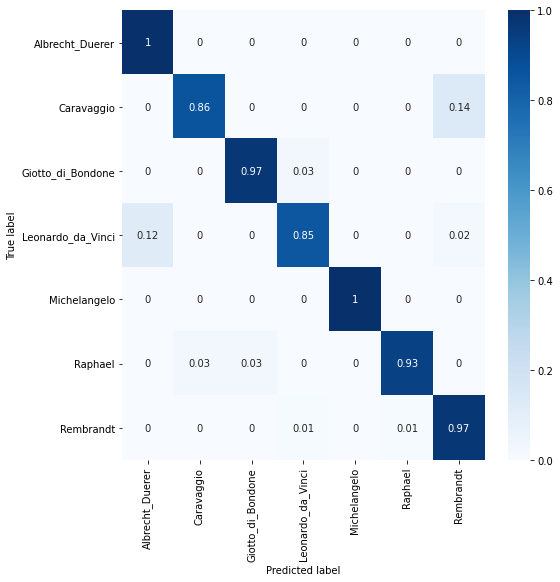

In [ ]:
classes = artist_list

con_mat = tf.math.confusion_matrix(labels=test_generator.classes, predictions=max_predict).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,index = classes,columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#artist_dict = {0:'Albrecht_Duerer',1:'Caravaggio',2:'Giotto_di_Bondone',3:'Leonardo_da_Vinci',4:'Michelangelo',5:'Raphael',6:'Rembrandt'}

#### view result

In [ ]:
#main_target_path = '/content/local_data'
#all_subdir = 'data_set'
#train_subdir = 'train'
#val_subdir = 'valid'
#test_subdir = 'test'

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from numpy import array, matrix, multiply

/content/local_data/test/Albrecht_Duerer/Albrecht_Duerer_y_106.jpg
[[9.9913257e-01 5.8865726e-07 2.3450466e-06 8.4926869e-04 6.3717226e-07
  7.2427969e-07 1.3921057e-05]]
Albrecht_Duerer


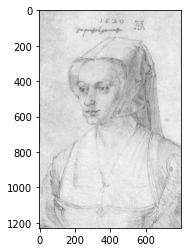

/content/local_data/test/Caravaggio/Caravaggio_6.jpg
[[2.2494991e-03 3.2460496e-01 1.6308818e-03 1.2514234e-02 3.1707156e-04
  9.4229560e-03 6.4926040e-01]]
Rembrandt


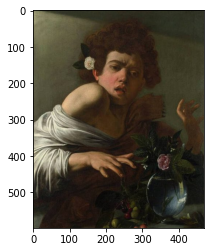

/content/local_data/test/Giotto_di_Bondone/Giotto_di_Bondone_89.jpg
[[7.5340181e-06 1.7363884e-05 9.9963522e-01 2.0637215e-05 2.0652030e-04
  1.0840634e-04 4.2840711e-06]]
Giotto_di_Bondone


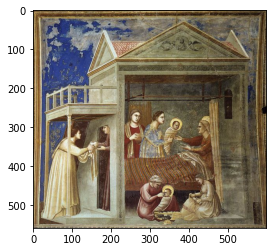

/content/local_data/test/Leonardo_da_Vinci/Leonardo_da_Vinci_122.jpg
[[1.4246625e-04 4.0459549e-03 1.3570598e-03 7.2356099e-01 1.3691063e-04
  3.3484010e-03 2.6740825e-01]]
Leonardo_da_Vinci


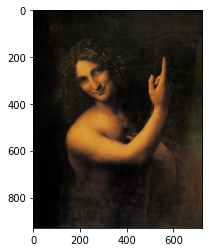

/content/local_data/test/Michelangelo/Michelangelo_34.jpg
[[2.3900784e-05 1.2705621e-04 8.1737567e-04 6.9393885e-05 9.7289068e-01
  2.6058199e-02 1.3325505e-05]]
Michelangelo


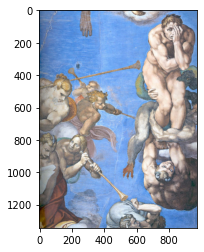

/content/local_data/test/Raphael/Raphael_66.jpg
[[8.5944339e-05 3.5379239e-04 4.5934151e-04 9.3792030e-04 3.2044475e-03
  9.9489945e-01 5.9114773e-05]]
Raphael


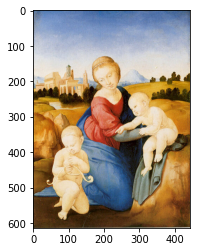

/content/local_data/test/Rembrandt/Rembrandt_224.jpg
[[1.1083473e-03 2.0048169e-04 2.1937503e-05 3.5313750e-03 1.4232403e-05
  1.2343453e-04 9.9500012e-01]]
Rembrandt


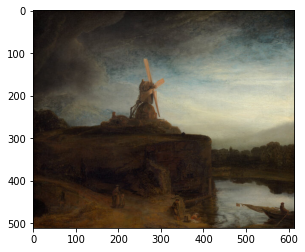

In [ ]:
for art in artist_list:
  img_path = os.path.join(main_target_path,test_subdir,art)
  # Paths and Variables
  img_file_list=os.listdir(img_path)
  img_file=np.random.choice(img_file_list)
  
  img_rdn=cv2.imread(os.path.join(os.sep,img_path,img_file))
  img_rdn_cvt = cv2.cvtColor(img_rdn, cv2.COLOR_BGR2RGB)
  
  img_rdn_cvt = img_rdn_cvt/255
  img_rdn_rs = cv2.resize(img_rdn_cvt, (224, 224), interpolation = cv2.INTER_AREA)
  
  test_predict = model_vgg16_c.predict(np.expand_dims(img_rdn_rs, axis=0))
  max_predict = np.argmax(test_predict, axis=-1)

  print(os.path.join(os.sep,img_path,img_file))
  print(test_predict)
  print(artist_dict.get(max_predict[0]))

  plt.imshow(img_rdn_cvt)
  plt.show()


In [ ]:
def plot_prediction(X_test,y_test,class_label,y_predict):
  plt.figure(figsize=(20,20))
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9)

  for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title("real "+class_label.get(y_test[i])+"\n predict "+class_label.get(y_test[i]))

  plt.show()

In [ ]:
in_shape

(224, 224, 3)

# resnet50

### top model

In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, Input, AveragePooling2D, Conv2D
from keras import initializers
from keras.callbacks import Callback


import tensorflow as tf

#from keras.backend.tensorflow_backend import set_session
#from keras.backend.tensorflow_backend import clear_session
#from keras.backend.tensorflow_backend import get_session

from keras.applications.resnet50 import ResNet50



In [ ]:
resnet50 = ResNet50(include_top=False, input_shape=in_shape)
resnet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
dropout_rate = 0.3
num_classes = 7

# Top Model
a = Input(shape=(7,7,2048))
#x = AveragePooling2D(7,7)(name='avg_pool_1')(a)
x = AveragePooling2D(7,7)(a)
x = Flatten()(x)
x = Dropout(dropout_rate)(x)
x = Dense(2048, kernel_initializer=initializers.he_normal(), bias_initializer=initializers.ones(),activation='relu')(x)
x = Dense(num_classes, kernel_initializer=initializers.he_normal(), bias_initializer=initializers.ones(), activation='softmax')(x)
top_model = Model(inputs=a, outputs=x)

top_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 7, 7, 2048)]      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 14343     
Total params: 4,210,695
Trainable params: 4,210,695
Non-trainable params: 0
___________________________________________________

In [ ]:
inp = Input(shape=in_shape)
y = resnet50(inp)
y = top_model(y)
final_model = Model(inp,y)

final_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
model (Functional)           (None, 7)                 4210695   
Total params: 27,798,407
Trainable params: 27,745,287
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
final_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [ ]:
mcp = ModelCheckpoint('final_model', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [ ]:
history_model_final_model = final_model.fit(train_generator,validation_data = valid_generator,epochs=30,callbacks=[mcp])    

Epoch 1/30
80/80 [==============================] - 27s 263ms/step - loss: 1.0299 - accuracy: 0.7181 - val_loss: 11.2725 - val_accuracy: 0.0879

Epoch 00001: val_accuracy improved from -inf to 0.08786, saving model to final_model
INFO:tensorflow:Assets written to: final_model/assets
Epoch 2/30
80/80 [==============================] - 18s 230ms/step - loss: 0.1109 - accuracy: 0.9640 - val_loss: 11.3833 - val_accuracy: 0.0801

Epoch 00002: val_accuracy did not improve from 0.08786
Epoch 3/30
80/80 [==============================] - 19s 235ms/step - loss: 0.0588 - accuracy: 0.9841 - val_loss: 8.5121 - val_accuracy: 0.0853

Epoch 00003: val_accuracy did not improve from 0.08786
Epoch 4/30
80/80 [==============================] - 19s 235ms/step - loss: 0.1238 - accuracy: 0.9665 - val_loss: 12.5735 - val_accuracy: 0.0827

Epoch 00004: val_accuracy did not improve from 0.08786
Epoch 5/30
80/80 [==============================] - 19s 233ms/step - loss: 0.1051 - accuracy: 0.9683 - val_loss: 10.2

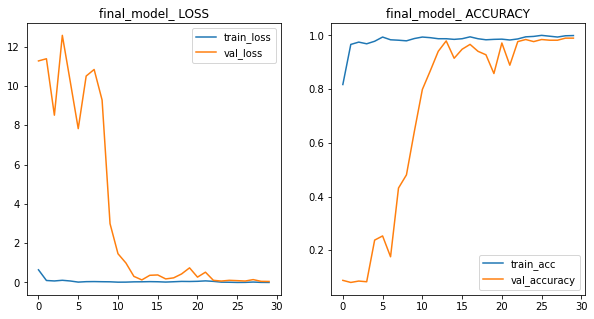

In [ ]:
history_plot_from_loss_acc(history_model_final_model,'final_model')

In [ ]:
best_final_model = load_model('final_model')

In [ ]:
best_final_model.evaluate(test_generator)

24/24 [==============================] - 5s 161ms/step - loss: 0.0639 - accuracy: 0.9869


[0.06387864053249359, 0.9869109988212585]

/content/local_data/test/Albrecht_Duerer/Albrecht_Duerer_x_50.jpg
[[9.9999952e-01 1.1750283e-12 2.6617987e-14 5.8120683e-12 3.1988229e-10
  4.0186062e-12 4.9157677e-07]]
Albrecht_Duerer


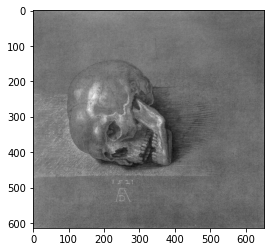

/content/local_data/test/Caravaggio/Caravaggio_1.jpg
[[3.1360648e-06 9.9965942e-01 1.1511752e-07 3.3386901e-04 3.6542659e-08
  1.0654061e-06 2.3325422e-06]]
Caravaggio


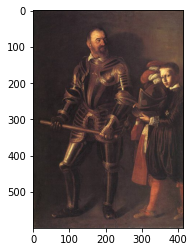

/content/local_data/test/Giotto_di_Bondone/Giotto_di_Bondone_71.jpg
[[1.6715056e-16 1.9542680e-18 1.0000000e+00 3.1705417e-18 2.1520282e-15
  1.6460919e-18 1.7662674e-19]]
Giotto_di_Bondone


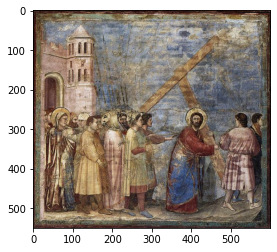

/content/local_data/test/Leonardo_da_Vinci/Leonardo_da_Vinci_7.jpg
[[0.5214089  0.00940675 0.01542525 0.13962923 0.04180895 0.21080185
  0.06151907]]
Albrecht_Duerer


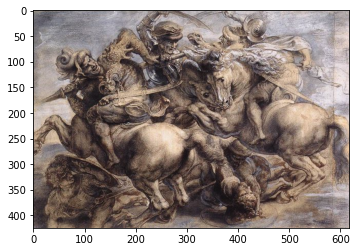

/content/local_data/test/Michelangelo/Michelangelo_34.jpg
[[1.0893227e-11 6.5902644e-11 1.1202995e-11 1.9818158e-11 1.0000000e+00
  1.1811070e-08 1.3097814e-13]]
Michelangelo


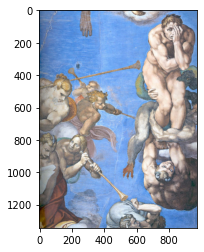

/content/local_data/test/Raphael/Raphael_54.jpg
[[6.8506636e-14 3.3999059e-14 3.8380868e-16 1.6827673e-14 1.1795259e-13
  1.0000000e+00 2.5547224e-13]]
Raphael


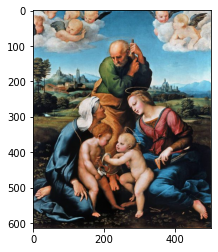

/content/local_data/test/Rembrandt/Rembrandt_223.jpg
[[1.5083801e-07 5.5777952e-07 6.1218017e-08 1.4751306e-06 2.0939527e-07
  1.8016785e-06 9.9999571e-01]]
Rembrandt


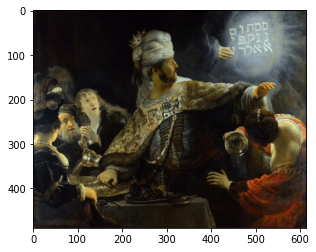

In [ ]:
for art in artist_list:
  img_path = os.path.join(main_target_path,test_subdir,art)
  # Paths and Variables
  img_file_list=os.listdir(img_path)
  img_file=np.random.choice(img_file_list)
  
  img_rdn=cv2.imread(os.path.join(os.sep,img_path,img_file))
  img_rdn_cvt = cv2.cvtColor(img_rdn, cv2.COLOR_BGR2RGB)
  
  img_rdn_cvt = img_rdn_cvt/255
  img_rdn_rs = cv2.resize(img_rdn_cvt, (224, 224), interpolation = cv2.INTER_AREA)
  
  test_predict = best_final_model.predict(np.expand_dims(img_rdn_rs, axis=0))
  max_predict = np.argmax(test_predict, axis=-1)

  print(os.path.join(os.sep,img_path,img_file))
  print(test_predict)
  print(artist_dict.get(max_predict[0]))

  plt.imshow(img_rdn_cvt)
  plt.show()

# Compare both models

Compare both models - which has more parameters?

Compile both models, train both models and evaluate both models on the test set.

# Data Augmentation

Now try to tune the hyperparameters, including

*   Optimizer
*   Data Augmentation (look at what keras has under the hood)



### Data Augmentation (look at what keras has under the hood)

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range = (0.7, 1.3),
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=359)

In [ ]:
train_generator = train_gen.flow_from_directory(directory="/content/local_data/train",target_size=(224,224),batch_size=16,shuffle=True,seed=42)

Found 1273 images belonging to 7 classes.


### simple

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [ ]:
mcp = ModelCheckpoint('best_model_simple', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [ ]:
history_model = model.fit(train_generator,validation_data = valid_generator,epochs=20,callbacks=[mcp])    

Epoch 1/20
80/80 [==============================] - 27s 335ms/step - loss: 0.8868 - accuracy: 0.7276 - val_loss: 0.3424 - val_accuracy: 0.8992

Epoch 00001: val_accuracy improved from -inf to 0.89922, saving model to best_model_simple
INFO:tensorflow:Assets written to: best_model_simple/assets
Epoch 2/20
80/80 [==============================] - 27s 335ms/step - loss: 0.6059 - accuracy: 0.7998 - val_loss: 0.2834 - val_accuracy: 0.9328

Epoch 00002: val_accuracy improved from 0.89922 to 0.93282, saving model to best_model_simple
INFO:tensorflow:Assets written to: best_model_simple/assets
Epoch 3/20
80/80 [==============================] - 27s 340ms/step - loss: 0.5391 - accuracy: 0.8132 - val_loss: 0.2319 - val_accuracy: 0.9509

Epoch 00003: val_accuracy improved from 0.93282 to 0.95090, saving model to best_model_simple
INFO:tensorflow:Assets written to: best_model_simple/assets
Epoch 4/20
80/80 [==============================] - 27s 337ms/step - loss: 0.5998 - accuracy: 0.7881 - val_lo

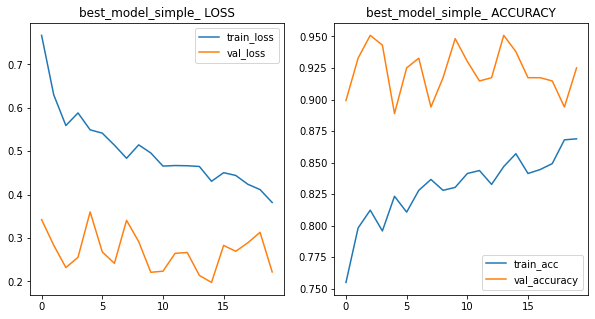

In [ ]:
history_plot_from_loss_acc(history_model,'best_model_simple')

In [ ]:
best_model = load_model('best_model_simple')
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 346112)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
best_model.evaluate(test_generator)

24/24 [==============================] - 3s 121ms/step - loss: 0.2422 - accuracy: 0.9450


[0.24215587973594666, 0.945026159286499]

### VGG16

In [ ]:
model_vgg16_c.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [ ]:
mcp = ModelCheckpoint('keras_applications_VGG16', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [ ]:
history_model_vgg16_c = model_vgg16_c.fit(train_generator,validation_data = valid_generator,epochs=30,callbacks=[mcp])    

Epoch 1/30
80/80 [==============================] - 30s 365ms/step - loss: 0.6382 - accuracy: 0.7948 - val_loss: 0.1649 - val_accuracy: 0.9587

Epoch 00001: val_accuracy improved from -inf to 0.95866, saving model to keras_applications_VGG16
INFO:tensorflow:Assets written to: keras_applications_VGG16/assets
Epoch 2/30
80/80 [==============================] - 29s 366ms/step - loss: 0.5532 - accuracy: 0.8180 - val_loss: 0.1192 - val_accuracy: 0.9690

Epoch 00002: val_accuracy improved from 0.95866 to 0.96899, saving model to keras_applications_VGG16
INFO:tensorflow:Assets written to: keras_applications_VGG16/assets
Epoch 3/30
80/80 [==============================] - 28s 355ms/step - loss: 0.5252 - accuracy: 0.8298 - val_loss: 0.1552 - val_accuracy: 0.9612

Epoch 00003: val_accuracy did not improve from 0.96899
Epoch 4/30
80/80 [==============================] - 28s 351ms/step - loss: 0.4847 - accuracy: 0.8242 - val_loss: 0.1339 - val_accuracy: 0.9638

Epoch 00004: val_accuracy did not im

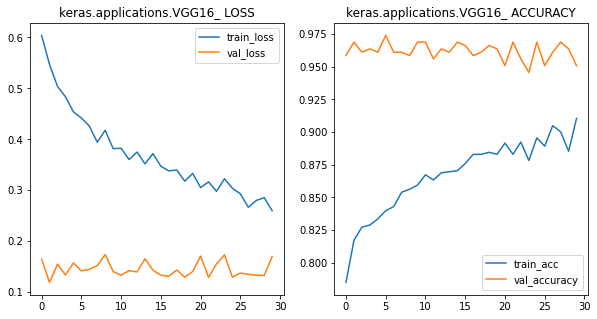

In [ ]:
history_plot_from_loss_acc(history_model_vgg16_c,'keras.applications.VGG16')

In [ ]:
best_keras_applications_VGG16_model = load_model('keras_applications_VGG16')

In [ ]:
best_keras_applications_VGG16_model.evaluate(test_generator)

24/24 [==============================] - 3s 132ms/step - loss: 0.1383 - accuracy: 0.9660


[0.1383160948753357, 0.9659686088562012]

### RESNET 50

#### top model

In [ ]:
dropout_rate = 0.3
num_classes = 7

# Top Model
a = Input(shape=(7,7,2048))
#x = AveragePooling2D(7,7)(name='avg_pool_1')(a)
x = AveragePooling2D(7,7)(a)
x = Flatten()(x)
x = Dropout(dropout_rate)(x)
x = Dense(2048, kernel_initializer=initializers.he_normal(), bias_initializer=initializers.ones(),activation='relu')(x)
x = Dense(num_classes, kernel_initializer=initializers.he_normal(), bias_initializer=initializers.ones(), activation='softmax')(x)
top_model = Model(inputs=a, outputs=x)

top_model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 7, 7, 2048)]      0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 14343     
Total params: 4,210,695
Trainable params: 4,210,695
Non-trainable params: 0
_________________________________________________

In [ ]:
inp = Input(shape=in_shape)
y = resnet50(inp)
y = top_model(y)
final_model = Model(inp,y)

final_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
model_2 (Functional)         (None, 7)                 4210695   
Total params: 27,798,407
Trainable params: 27,745,287
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
final_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [ ]:
mcp = ModelCheckpoint('final_model', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [ ]:
history_model_final_model = final_model.fit(train_generator,validation_data = valid_generator,epochs=50,callbacks=[mcp])    

Epoch 1/50
80/80 [==============================] - 36s 398ms/step - loss: 0.8128 - accuracy: 0.7565 - val_loss: 0.0863 - val_accuracy: 0.9742

Epoch 00001: val_accuracy improved from -inf to 0.97416, saving model to final_model
INFO:tensorflow:Assets written to: final_model/assets
Epoch 2/50
80/80 [==============================] - 31s 386ms/step - loss: 0.2423 - accuracy: 0.9167 - val_loss: 0.1569 - val_accuracy: 0.9432

Epoch 00002: val_accuracy did not improve from 0.97416
Epoch 3/50
80/80 [==============================] - 31s 388ms/step - loss: 0.2531 - accuracy: 0.9148 - val_loss: 0.5647 - val_accuracy: 0.8966

Epoch 00003: val_accuracy did not improve from 0.97416
Epoch 4/50
80/80 [==============================] - 32s 394ms/step - loss: 0.1860 - accuracy: 0.9400 - val_loss: 0.0820 - val_accuracy: 0.9716

Epoch 00004: val_accuracy did not improve from 0.97416
Epoch 5/50
80/80 [==============================] - 31s 390ms/step - loss: 0.2290 - accuracy: 0.9225 - val_loss: 0.0738 

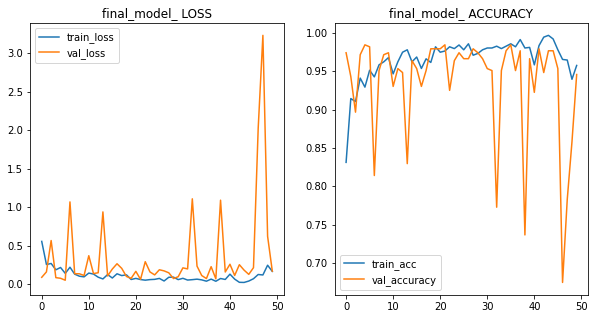

In [ ]:
history_plot_from_loss_acc(history_model_final_model,'final_model')

In [ ]:
best_final_model = load_model('final_model')

In [ ]:
best_final_model.evaluate(test_generator)

24/24 [==============================] - 4s 137ms/step - loss: 0.0887 - accuracy: 0.9791


[0.0887288823723793, 0.9790576100349426]

In [ ]:
y_predict_resnet_au = best_final_model.predict(test_generator)

In [ ]:
y_predict_resnet_au = np.argmax(y_predict_resnet_au, axis=-1)

In [ ]:
len(y_predict_resnet_au)

382

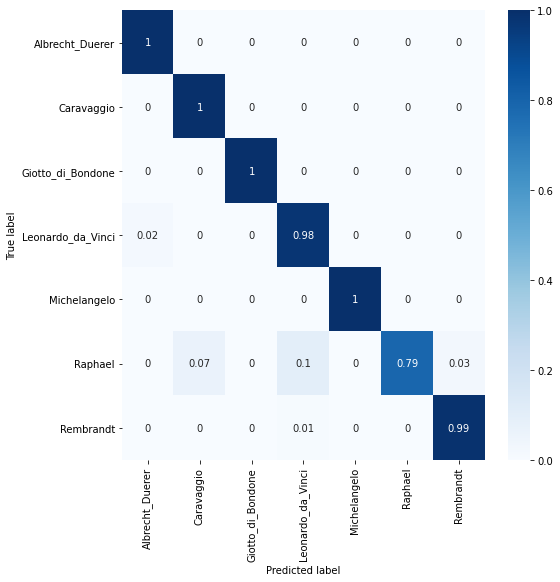

In [ ]:
plot_confusion_matrix_x(test_generator.classes,y_predict_resnet_au,artist_list)

# Have you checked ...

Have you checked how "good" or "bad" the model performs for different painters? 

Just implement a function that gives you the accuracy and/or other metric for each class. 

Plot the class size vs. the accuracy (and or other metrics)

Are you happy with that result?

If not (and even if you are quite content), try to think how you could improve the project accuracy. Note that I have not written model accuracy!!!

Really do think about it - and then go on to the next quest!



# The End